In [252]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

In [253]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import re

In [254]:
# Load the dataset
df = pd.read_csv(r'H:\AI mini Project\Movie classifications\test_kaggle.csv\test_kaggle.csv')

In [255]:
df = df.dropna()

In [256]:
df.head(2)

,title_index,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,budget,usa_gross_income,worlwide_gross_income
11,11,Pohwasogeuro,Pohwasogeuro,2010,2010-06-16,"Action, Drama, War",120,South Korea,"Korean, English",John H. Lee,"Man-Hee Lee, Dong-Woo Kim",Taewon Entertainment,"Seung-Won Cha, Sang-Woo Kwon, Seung-Hyun Choi,...",The story of student-soldiers trying to protec...,$ 10000000,$ 176638,$ 20967660
40,40,Babadook,The Babadook,2014,2015-07-15,"Drama, Horror",94,"Australia, Canada",English,Jennifer Kent,Jennifer Kent,Screen Australia,"Essie Davis, Noah Wiseman, Hayley McElhinney, ...",A single mother and her child fall into a deep...,$ 2000000,$ 964413,$ 10312540


In [257]:
df = df.fillna('0')
# Assuming df is your DataFrame
features = df.drop(['usa_gross_income','worlwide_gross_income'], axis=1)
targets = df[['usa_gross_income','worlwide_gross_income']]

In [258]:
# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [259]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [260]:

y_train_preprocessed = np.vectorize(lambda x: float(re.sub(r'\D', '', x)))(y_train)
y_test_preprocessed = np.vectorize(lambda x: float(re.sub(r'\D', '', x)))(y_test)

In [261]:
print(X_train.shape, X_test.shape, y_train_preprocessed.shape, y_test_preprocessed.shape)

(1528, 15) (382, 15) (1528, 2) (382, 2)


In [262]:
# Convert the data to numpy arrays
X_train = X_train.values
X_test = X_test.values


In [263]:
y_train_preprocessed = y_train_preprocessed.astype('int')
y_train_preprocessed = y_train_preprocessed.astype('int')


C:\Users\origi\AppData\Local\Temp\ipykernel_6332\1239337700.py:1: RuntimeWarning: invalid value encountered in cast
  y_train_preprocessed = y_train_preprocessed.astype('int')


In [264]:
#remove single quotes
X_train = np.array([str(i).replace("'", "") for i in X_train])
X_test = np.array([str(i).replace("'", "") for i in X_test])




In [265]:
y_test_preprocessed
y_train_preprocessed

array([[   205569,    205569],
       [ 23637265,  80743363],
       [113804681, 222104681],
       ...,
       [ 36144000,  36179290],
       [ 19889299,  19889299],
       [ 11901145,  18096691]])

In [266]:
# Tokenize the data
num_words = 10000

In [267]:
tokenizer = Tokenizer(num_words=num_words)

In [268]:
lower_data = [str(item).lower() for item in X_train]
tokenizer.fit_on_texts(lower_data)

In [269]:
X_train[1]

'[10956 Hot Fuzz Hot Fuzz 2007 2007-08-24 Action, Comedy, Mystery\n 121 UK, France English Edgar Wright Edgar Wright, Simon Pegg\n StudioCanal\n Simon Pegg, Martin Freeman, Bill Nighy, Robert Popper, Joe Cornish, Chris Waitt, Eric Mason, Billie Whitelaw, Nick Frost, Peter Wight, Julia Deakin, Tom Strode Walton, Troy Woollan, Rory Lowings, Bill Bailey\n A skilled London police officer is transferred to a small town with a dark secret.\n GBP 8000000]'

In [270]:
print(lower_data[1])

[10956 hot fuzz hot fuzz 2007 2007-08-24 action, comedy, mystery
 121 uk, france english edgar wright edgar wright, simon pegg
 studiocanal
 simon pegg, martin freeman, bill nighy, robert popper, joe cornish, chris waitt, eric mason, billie whitelaw, nick frost, peter wight, julia deakin, tom strode walton, troy woollan, rory lowings, bill bailey
 a skilled london police officer is transferred to a small town with a dark secret.
 gbp 8000000]


In [271]:
if num_words is None:
    num_words = len(tokenizer.word_index)

In [272]:
tokenizer.word_index

{'a': 1,
 'the': 2,
 'english': 3,
 'to': 4,
 'of': 5,
 'usa': 6,
 'and': 7,
 'in': 8,
 'drama': 9,
 'his': 10,
 'comedy': 11,
 'michael': 12,
 'john': 13,
 'david': 14,
 'is': 15,
 'with': 16,
 'an': 17,
 'pictures': 18,
 'her': 19,
 'james': 20,
 'action': 21,
 'on': 22,
 'robert': 23,
 'crime': 24,
 'for': 25,
 'their': 26,
 'adventure': 27,
 'who': 28,
 'romance': 29,
 'he': 30,
 'uk': 31,
 'richard': 32,
 'paul': 33,
 'peter': 34,
 'by': 35,
 'when': 36,
 'from': 37,
 'thriller': 38,
 'tom': 39,
 'that': 40,
 '01': 41,
 '09': 42,
 '04': 43,
 'family': 44,
 'new': 45,
 'young': 46,
 '10': 47,
 'j': 48,
 '03': 49,
 'after': 50,
 'films': 51,
 '05': 52,
 'scott': 53,
 'french': 54,
 '11': 55,
 'mark': 56,
 'as': 57,
 '12': 58,
 'il': 59,
 'chris': 60,
 'lee': 61,
 '02': 62,
 'man': 63,
 'life': 64,
 'la': 65,
 '08': 66,
 'spanish': 67,
 '06': 68,
 'productions': 69,
 'france': 70,
 'william': 71,
 'entertainment': 72,
 'horror': 73,
 'christopher': 74,
 'jason': 75,
 'thomas': 76,
 '

In [273]:
x_train_tokens = tokenizer.texts_to_sequences(lower_data)

In [274]:
lower_data[1]

'[10956 hot fuzz hot fuzz 2007 2007-08-24 action, comedy, mystery\n 121 uk, france english edgar wright edgar wright, simon pegg\n studiocanal\n simon pegg, martin freeman, bill nighy, robert popper, joe cornish, chris waitt, eric mason, billie whitelaw, nick frost, peter wight, julia deakin, tom strode walton, troy woollan, rory lowings, bill bailey\n a skilled london police officer is transferred to a small town with a dark secret.\n gbp 8000000]'

In [275]:
np.array(x_train_tokens[1])

array([1150, 7099, 1150, 7099,  114,  114,   66,  233,   21,   11,   87,
        969,   31,   70,    3, 2085,  332, 2085,  332,  262, 2771, 4020,
        262, 2771,   89,  520,   79, 2772,   23,   96, 2773,   60,  160,
       1151, 4021, 7100,  162, 1542,   34, 5127,  413, 7101,   39, 1543,
       1690, 2387,   79,  970,    1, 3306,  782,  632,  746,   15,    4,
          1,  311,  342,   16,    1,  870,  660,  871,  485])

In [276]:
x_test_tokens = tokenizer.texts_to_sequences([str(item).lower() for item in X_test])

In [277]:
# Pad and truncate sequences
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [278]:
np.mean(num_tokens)

71.10994764397905

In [279]:
np.max(num_tokens)

117

In [280]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

93

In [281]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9722513089005236

In [282]:
pad = 'pre'

In [283]:
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens,
                            padding=pad, truncating=pad)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens,
                            padding=pad, truncating=pad)

In [284]:
x_train_pad.shape

(1528, 93)

In [285]:
np.array(x_train_tokens[1])

array([1150, 7099, 1150, 7099,  114,  114,   66,  233,   21,   11,   87,
        969,   31,   70,    3, 2085,  332, 2085,  332,  262, 2771, 4020,
        262, 2771,   89,  520,   79, 2772,   23,   96, 2773,   60,  160,
       1151, 4021, 7100,  162, 1542,   34, 5127,  413, 7101,   39, 1543,
       1690, 2387,   79,  970,    1, 3306,  782,  632,  746,   15,    4,
          1,  311,  342,   16,    1,  870,  660,  871,  485])

In [286]:
x_train_pad[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0, 1150, 7099, 1150, 7099,
        114,  114,   66,  233,   21,   11,   87,  969,   31,   70,    3,
       2085,  332, 2085,  332,  262, 2771, 4020,  262, 2771,   89,  520,
         79, 2772,   23,   96, 2773,   60,  160, 1151, 4021, 7100,  162,
       1542,   34, 5127,  413, 7101,   39, 1543, 1690, 2387,   79,  970,
          1, 3306,  782,  632,  746,   15,    4,    1,  311,  342,   16,
          1,  870,  660,  871,  485])

In [287]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

In [288]:
def tokens_to_string(tokens):
    # Map from tokens back to words.
    words = [inverse_map[token] for token in tokens if token != 0]
    
    # Concatenate all words.
    text = " ".join(words)

    return text

In [289]:
X_train[1]

'[10956 Hot Fuzz Hot Fuzz 2007 2007-08-24 Action, Comedy, Mystery\n 121 UK, France English Edgar Wright Edgar Wright, Simon Pegg\n StudioCanal\n Simon Pegg, Martin Freeman, Bill Nighy, Robert Popper, Joe Cornish, Chris Waitt, Eric Mason, Billie Whitelaw, Nick Frost, Peter Wight, Julia Deakin, Tom Strode Walton, Troy Woollan, Rory Lowings, Bill Bailey\n A skilled London police officer is transferred to a small town with a dark secret.\n GBP 8000000]'

In [290]:
tokens_to_string(x_train_tokens[1])

'hot fuzz hot fuzz 2007 2007 08 24 action comedy mystery 121 uk france english edgar wright edgar wright simon pegg studiocanal simon pegg martin freeman bill nighy robert joe cornish chris eric mason billie whitelaw nick frost peter wight julia deakin tom walton troy rory bill bailey a skilled london police officer is to a small town with a dark secret gbp 8000000'

In [296]:
model = Sequential()
embedding_size = 8
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='layer_embedding'))
model.add(GRU(units=64, return_sequences=True))
model.add(GRU(units=64, return_sequences=True))
model.add(GRU(units=32, return_sequences=True))
model.add(GRU(units=16, return_sequences=True))
model.add(GRU(units=8, return_sequences=True))
model.add(GRU(units=4))
model.add(Dense(2, activation='softmax'))
optimizer = Adam(lr=1e-3)

In [297]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [298]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_embedding (Embedding)  (None, 93, 8)            80000     
                                                                 
 gru_93 (GRU)                (None, 93, 64)            14208     
                                                                 
 gru_94 (GRU)                (None, 93, 64)            24960     
                                                                 
 gru_95 (GRU)                (None, 93, 32)            9408      
                                                                 
 gru_96 (GRU)                (None, 93, 16)            2400      
                                                                 
 gru_97 (GRU)                (None, 93, 8)             624       
                                                                 
 gru_98 (GRU)                (None, 4)               

In [299]:
y_train_preprocessed

array([[   205569,    205569],
       [ 23637265,  80743363],
       [113804681, 222104681],
       ...,
       [ 36144000,  36179290],
       [ 19889299,  19889299],
       [ 11901145,  18096691]])

In [300]:
model.fit(x_train_pad, y_train_preprocessed, epochs=300, batch_size=256)

Epoch 1/300


6/6 [==============================] - 8s 68ms/step - loss: -4594411.0000 - accuracy: 0.6355
Epoch 2/300
6/6 [==============================] - 0s 31ms/step - loss: -24842704.0000 - accuracy: 0.6656
Epoch 3/300
6/6 [==============================] - 0s 30ms/step - loss: -47424076.0000 - accuracy: 0.6656
Epoch 4/300
6/6 [==============================] - 0s 31ms/step - loss: -58036560.0000 - accuracy: 0.6656
Epoch 5/300
6/6 [==============================] - 0s 32ms/step - loss: -64723416.0000 - accuracy: 0.6656
Epoch 6/300
6/6 [==============================] - 0s 31ms/step - loss: -68454512.0000 - accuracy: 0.6656
Epoch 7/300
6/6 [==============================] - 0s 37ms/step - loss: -72570072.0000 - accuracy: 0.6656
Epoch 8/300
6/6 [==============================] - 0s 33ms/step - loss: -76373488.0000 - accuracy: 0.6656
Epoch 9/300
6/6 [==============================] - 0s 33ms/step - loss: -79934344.0000 - accuracy: 0.6656
Epoch 10/300
6/6 [==============================] - 0s 33ms

In [301]:
result = model.evaluate(x_test_pad, y_test_preprocessed)

12/12 [==============================] - 2s 14ms/step - loss: -567100224.0000 - accuracy: 0.6806


In [302]:
print("Accuracy: {0:.2%}".format(result[1]))

Accuracy: 68.06%


In [303]:
y_pred = model.predict(x_test_pad)

12/12 [==============================] - 2s 17ms/step


In [304]:
y_pred

array([[0.339996  , 0.66000396],
       [0.3399958 , 0.66000414],
       [0.33999518, 0.66000485],
       [0.3399956 , 0.66000444],
       [0.33999455, 0.66000545],
       [0.33999345, 0.6600065 ],
       [0.3399958 , 0.66000414],
       [0.339996  , 0.66000396],
       [0.339996  , 0.66000396],
       [0.3399958 , 0.66000414],
       [0.339996  , 0.66000396],
       [0.3399958 , 0.66000414],
       [0.3399958 , 0.66000414],
       [0.33999258, 0.66000736],
       [0.3399958 , 0.66000414],
       [0.3399958 , 0.66000414],
       [0.339996  , 0.66000396],
       [0.339996  , 0.66000396],
       [0.339996  , 0.66000396],
       [0.3399958 , 0.66000414],
       [0.3399956 , 0.66000444],
       [0.33999538, 0.6600046 ],
       [0.3399958 , 0.66000414],
       [0.3399958 , 0.66000414],
       [0.339996  , 0.66000396],
       [0.33999518, 0.66000485],
       [0.3399956 , 0.66000444],
       [0.339996  , 0.66000396],
       [0.3399958 , 0.66000414],
       [0.33999622, 0.6600037 ],
       [0.

In [307]:
hist = model.fit(x_train_pad, y_train_preprocessed, validation_data=(x_test_pad, y_test_preprocessed), epochs=300, batch_size=256)

Epoch 1/300
6/6 [==============================] - 0s 53ms/step - loss: -596119104.0000 - accuracy: 0.6656 - val_loss: -568697920.0000 - val_accuracy: 0.6806
Epoch 2/300
6/6 [==============================] - 0s 42ms/step - loss: -597749312.0000 - accuracy: 0.6656 - val_loss: -570318272.0000 - val_accuracy: 0.6806
Epoch 3/300
6/6 [==============================] - 0s 48ms/step - loss: -599502976.0000 - accuracy: 0.6656 - val_loss: -571892800.0000 - val_accuracy: 0.6806
Epoch 4/300
6/6 [==============================] - 0s 41ms/step - loss: -601160256.0000 - accuracy: 0.6656 - val_loss: -573476416.0000 - val_accuracy: 0.6806
Epoch 5/300
6/6 [==============================] - 0s 42ms/step - loss: -602861376.0000 - accuracy: 0.6656 - val_loss: -575044032.0000 - val_accuracy: 0.6806
Epoch 6/300
6/6 [==============================] - 0s 42ms/step - loss: -604494464.0000 - accuracy: 0.6656 - val_loss: -576636032.0000 - val_accuracy: 0.6806
Epoch 7/300
6/6 [==============================] - 0

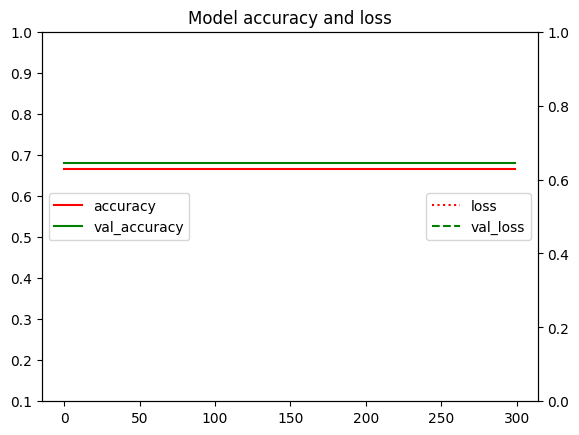

In [308]:
# Code plot loss and accuracy
def plotloss_acc(train_history,acclim,losslim):
  fig=plt.figure()
  ax1=fig.gca()
  ax1.set_title("Model accuracy and loss")
  ax1.plot(train_history.history['accuracy'],label="accuracy",c='r')
  ax1.plot(train_history.history['val_accuracy'],label="val_accuracy",c='g')
  ax1.set_ylim(acclim)
  ax2=ax1.twinx()
  ax2.plot(train_history.history['loss'],label="loss",c='r',ls=":")
  ax2.plot(train_history.history['val_loss'],label="val_loss",c='g',ls="--")
  ax2.set_ylim(losslim)
  ax1.legend(loc='center left')
  ax2.legend(loc='center right')
  plt.show()
plotloss_acc(hist,[0.1,1],[0,1])